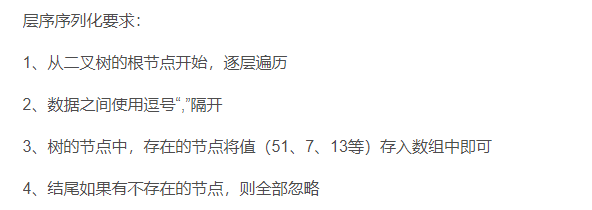

层序序列化，每一层每一层保存

### 层序遍历，也就是 BFS 遍历？

In [7]:
class Node:
    def __init__(self,x):
        self.v = x 
        self.left = None 
        self.right = None 
        
from collections import deque
        
# 递归先序遍历，序列化
def serialByPre(head):
    if head is None:
        return "#!"
    res = str(head.v) + "!"
    res  += serialByPre(head.left)
    res  += serialByPre(head.right) 
    return res 

# 层序序列化 
def serialBylevel(head):
    if not head:
        return "#!"
    res = str(head.v) + '!'
    queue = deque()
    queue.append(head) 
    while len(queue) > 0:
        cur = queue.pop()
        if cur.left:
            res += str(cur.left.v) + '!'
            queue.appendleft(cur.left)
        else:
            res += "#!"
        if cur.right:
            res += str(cur.right.v) + '!'
            queue.appendleft(cur.right)
        else:
            res += "#!"
    return res

if __name__== "__main__":
    n,root = list(map(int,input().split()))
    nodes = [Node(i) for i in range(n+1)]
    nodes[0] = None 

    # 根据输入构造树
    for i in range(n):
        fa,lch,rch = list(map(int, input().split()))  
        nodes[fa].left = nodes[lch] 
        nodes[fa].right = nodes[rch]   
    head = nodes[root]  #树的根节点 

    print(serialByPre(head))
    # print(end='\n')
    print(serialBylevel(head))

2 1
1 2 0
2 0 0
1!2!#!#!#!
1!2!#!#!#!


### 没有通过的原因，可能是由于  str(i) 转转了很多次。 数据量一大，就占用了不少时间。

###  如果通过字典形式去构造树，就没有这样的问题了。

### 跑通的代码，原来用字典构造树，可以节省很多的运行时间？

In [ ]:
# -*- coding: utf-8 -*- # 
# @Time    : 2021-05-23 12:14
# @Email   : zhilishen@smail.nju.edu.cn
# @Author  : Zhili Shen
# @File    : test.py
# @Notice  :
from collections import deque

class Node:
    def __init__(self, value):
        self.value = value
        self.right = None
        self.left = None


def serial_by_pre(head: Node):
    if not head:
        return "#!"
    res = head.value + "!"
    res += serial_by_pre(head.left)
    res += serial_by_pre(head.right)
    return res


def serial_by_level(head: Node):
    if not head:
        return "#!"
    res = head.value + "!"
    queue = deque()
    queue.append(head)
    while len(queue)>0:
        head = queue.pop()
        if head.left:
            res += head.left.value + "!"
            queue.appendleft(head.left)
        else:
            res += "#!"
        if head.right:
            res += head.right.value + "!"
            queue.appendleft(head.right)
        else:
            res += "#!"
    return res




if __name__ == "__main__":
    n, r = input().split(' ')
    root = Node(r)
    node_dict = {r: root}
    for _ in range(int(n)):
        value, left, right = input().split(" ")
        if left != '0':
            node_dict[left] = Node(left)
            node_dict[value].left = node_dict[left]
        if right != '0':
            node_dict[right] = Node(right)
            node_dict[value].right = node_dict[right]

    a = serial_by_pre(root)
    print(a)
    b = serial_by_level(root)
    print(b)